In [2]:
from scipy import stats,special
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from random import choices
from glob import glob
import xarray as xr
import datetime as dt

# **Probability Distribution Refresher**

### A probability distribution $P$ is a model for our knowledge about one or more given variable(s) $X$. In the context that our knowledge is incomplete (i.e., nondeterministic), we call $X$ a **random variable** as the value of $X$ may depend on unseen "random" variations. We call the values that $X$ can take the **support** of $X$. For most of 1-D applications, we are interested in RVs whose support is some subset of real numbers contained in the interval $(-\infty,\infty)$. 

### That's a bit abstract, so when we can we resort to describing a distribution with its Cumulative Density Function (CDF): $$ F(x) = P(x \leq X) $$ If $F$ is differentiable, the Probability Density Function (PDF) $p(x) = F'(x)$. For a real valued RV $X$, the integral of the PDF, $\int_a^b p(x) dx$, gives the probability that $X$ falls in a certain interval $[a,b]$. With a distribution $P$ with density $p$ and support A (i.e., the set of values that $X$ can be), we define the expectation operator $E[\cdot]$ with the integral $$ E[f(x)] = \int_A f(x)p(x)dx. $$  The mean is given by
### $$\mu := E[x]:=\int_A xp(x) dx$$ and variance by
### $$\sigma^2 := E[(x-\mu)^2] := \int_A (x-\mu)^2 p(x) dx.$$ These numbers tell us about the central tendency and spread of the distribution.

## **Gaussian Distribution**
### For example, recall the **Gaussian** (or Normal) distribution, which is symmetric about its mean with spread given by the variance $\sigma^2$ and has PDF: $$p(x;\mu,\sigma^2) = \frac{1}{\sigma\sqrt{2\pi}}e^\frac{-(x-\mu)^2}{2\sigma^2} $$ The support of this distribution is $(-\infty,\infty)$ meaning that $p(x) > 0$ on that interval.

In [3]:
def gaus_pdf(x,mu=0,sig=1):
    return np.exp(-(x-mu)**2/sig**2/2)/sig/np.sqrt(2*np.pi)

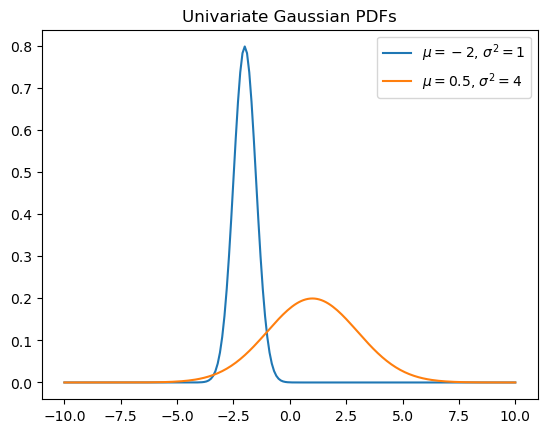

In [4]:
# Specify the mean and standard deviation:
mu = [-2.0,1.0]
std = [0.5,2.0]

x = np.linspace(-10,10,201)
fig,ax = plt.subplots(1,1)
g1 = ax.plot(x,gaus_pdf(x,mu[0],std[0]))
g2 = ax.plot(x,gaus_pdf(x,mu[1],std[1]))
ax.set_title('Univariate Gaussian PDFs')
ax.legend([g1[0],g2[0]],[r'$\mu = -2$, $\sigma^2 = 1$',r'$\mu = 0.5$, $\sigma^2 = 4$'])

## Other Univariate Distributions
### **Exponential** Distribution (waiting times between IID events)
### $ f(x;\lambda) = \lambda \exp(-\lambda x), {}$ $ x >= 0 $
### **Gamma Distribution** (waiting time until a specific event) :
### $ f(x;\alpha,\beta) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}x^{\alpha-1}(1-x)^{\beta-1}$
### **Log-normal Distribution**
### $ f(x;\mu,\sigma) = \frac{1}{x\sigma\sqrt{2\pi}}\exp(-\frac{(\ln x - \mu)^2}{2\sigma^2})$
### **Simple Gaussian Mixture**
### $ f(x;\mu_1,\sigma_1,\mu_2,\sigma_2,\alpha) = \alpha f_G(x; \mu_1,\sigma_1) + (1-\alpha)*f_G(x;\mu_2,\sigma_2) $

In [5]:
def gam_pdf(x,a=2,b=2):
    return special.gamma(a+b)/special.gamma(a)/special.gamma(b)*x**(a-1)*(1-x)**(b-1)
def exp_pdf(x,lam=1):
    return lam*np.exp(-lam*x)
def lnorm_pdf(x,mu=0,sig=1):
    return np.exp(-(np.log(x)-mu)**2/2/sig**2)/(x*sig*np.sqrt(2*np.pi))

/var/folders/rs/19n1gwk93bx64vmlp3fgdy_h0000gn/T/ipykernel_71132/843990757.py:6: RuntimeWarning: divide by zero encountered in log
  return np.exp(-(np.log(x)-mu)**2/2/sig**2)/(x*sig*np.sqrt(2*np.pi))
/var/folders/rs/19n1gwk93bx64vmlp3fgdy_h0000gn/T/ipykernel_71132/843990757.py:6: RuntimeWarning: invalid value encountered in divide
  return np.exp(-(np.log(x)-mu)**2/2/sig**2)/(x*sig*np.sqrt(2*np.pi))


Text(0.5, 1.0, 'Gaussian Mixture Examples')

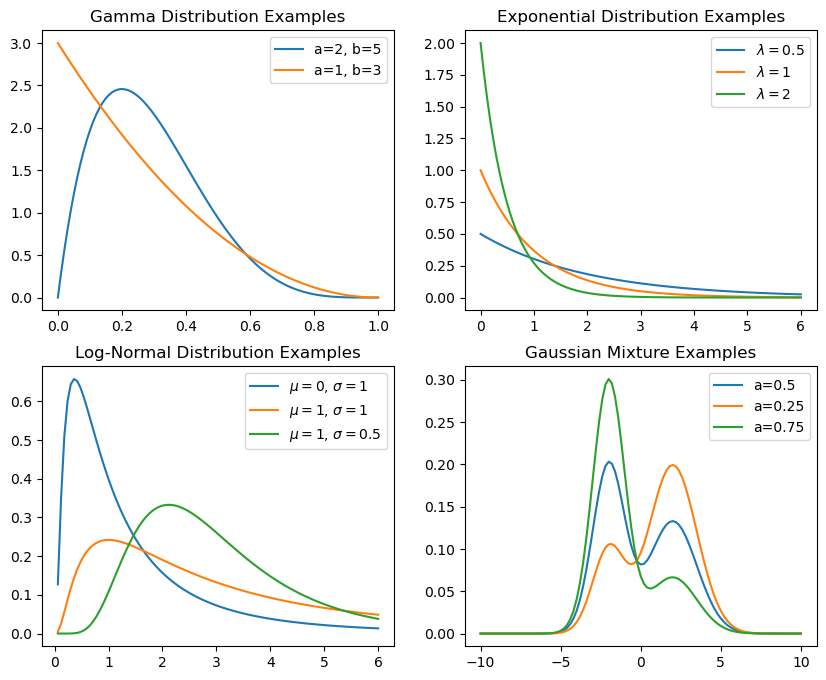

In [6]:
x = np.linspace(0,1,101)

fig,axs = plt.subplots(2,2,figsize=(10,8))

ax = axs[0,0]
g1 = ax.plot(x,gam_pdf(x,a=2,b=5))
g2 = ax.plot(x,gam_pdf(x,a=1,b=3))
ax.legend([g1[0],g2[0]],['a=2, b=5','a=1, b=3'])
ax.set_title('Gamma Distribution Examples');

ax = axs[0,1]
x = np.linspace(0,6,101)
g1 = ax.plot(x,exp_pdf(x,lam=0.5))
g2 = ax.plot(x,exp_pdf(x,lam=1))
g3 = ax.plot(x,exp_pdf(x,lam=2))
ax.legend([g1[0],g2[0],g3[0]],['$\lambda=0.5$','$\lambda=1$','$\lambda=2$'])
ax.set_title('Exponential Distribution Examples')

ax = axs[1,0]
x = np.linspace(0,6,101)
g1 = ax.plot(x,lnorm_pdf(x,mu=0,sig=1))
g2 = ax.plot(x,lnorm_pdf(x,mu=1,sig=1))
g3 = ax.plot(x,lnorm_pdf(x,mu=1,sig=0.5))
ax.legend([g1[0],g2[0],g3[0]],['$\mu=0$, $\sigma=1$','$\mu=1$, $\sigma=1$','$\mu=1$, $\sigma=0.5$'])
ax.set_title('Log-Normal Distribution Examples')

x=np.linspace(-10,10,101)
pdf1 = gaus_pdf(x,mu=-2,sig=1)
pdf2 = gaus_pdf(x,mu=2,sig=1.5)
ax = axs[1,1]
g1 = ax.plot(x,0.5*pdf1+0.5*pdf2)
g2 = ax.plot(x,0.25*pdf1+0.75*pdf2)
g3 = ax.plot(x,0.75*pdf1+0.25*pdf2)
ax.legend([g1[0],g2[0],g3[0]],['a=0.5','a=0.25','a=0.75'])
ax.set_title('Gaussian Mixture Examples')

### The last panel shows densities with two maxima or **modes**, indicating that there are multiple states of our variable with some "heft" to them. For example, a region may have a wet season and a dry season with average temperatures and little variation otherwise. We call these distributions "multi-modal". 

## Sampling Univariate Distributions
### With a PDF $f$ we can use the method `choices` from the `random` module to create a discrete sample, which can be helpful for doing numerical calculations. 

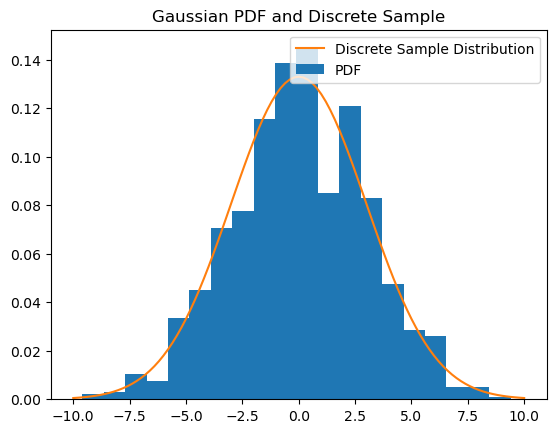

In [7]:
# Sample the PDF
x = np.linspace(-10,10,101)
y = gaus_pdf(x,mu=0,sig=3)

# Create a histogram
plt.hist(choices(x,y/y.sum(),k=1001),bins=20,density=True)

# Plot the PDF for comparison
plt.plot(x,y)

plt.legend(['Discrete Sample Distribution','PDF']);
plt.title('Gaussian PDF and Discrete Sample');

### Copy this code to the cell below and rerun it a few times to see how the sample changes with each random draw - this will come up again later when we simulate random errors in observational data.

In [8]:
# Copy the code here!


## Let's try this with some real data samples and `pandas` helper functions
### We read in the data from the Park Falls tower and plot the daytime vs. nighttime sample distributions

In [9]:
# Open some files from the Park Falls tower in Wisconsin - files distinguish between standard altitudes for samples collected
files = glob('../obspack_co2_1_GLOBALVIEWplus_v9.1_2023-12-08/data/nc/co2_lef_tower-insitu_1_allvalid*.nc')
lef_all = {}
lef_day = {}
lef_night = {}
for fi in files:
    ht = int(fi.split('-')[-1].split('.nc')[0].split('magl')[0])
    tmp = xr.open_dataset(fi)
    lef_all[ht] = pd.DataFrame({'co2':tmp['value'].data*1e6,'lat':tmp['latitude'].data,'lon':tmp['longitude']},index=tmp['time'].data)
    solar_time = np.array([lef_all[ht].index[i] + dt.timedelta(hours=lef_all[ht]['lon'].iloc[i]/180. * 12) for i in range(len(lef_all[ht].index))])
    lef_all[ht].index = solar_time[:]

# Separate data into daytime and nighttime
for ht in lef_all.keys():
    lef_day[ht] = lef_all[ht].between_time('12:00','16:00').groupby(pd.Grouper(freq='D')).mean()
    lef_day[ht].dropna()
    lef_night[ht] = lef_all[ht].between_time('0:00','4:00').groupby(pd.Grouper(freq='D')).mean()
    lef_night[ht].dropna()
    
print(f'Altitudes are {sorted(list(lef_all.keys()))} (meters above the surface)')

Altitudes are [11, 30, 76, 122, 244, 396] (meters above the surface)


### This plotting script uses `pandas` `hist` method to construct histograms for the daytime and nighttime data, then plots the mean of the distribution as a vertical line. 

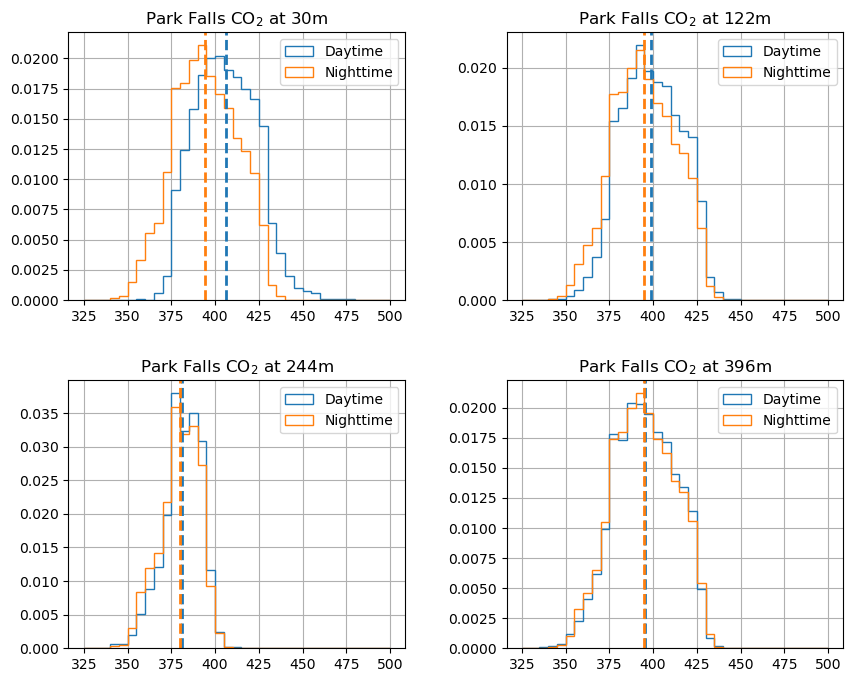

In [10]:
fig,axs = plt.subplots(2,2,figsize=(10,8))
for ih,h in enumerate([30,122,244,396]):
    ax = axs[ih//2,ih%2]
    lef_night[h].hist('co2',ax=ax,density=True,bins=np.linspace(325,500,36),histtype='step')
    lef_day[h].hist('co2',ax=ax,density=True,bins=np.linspace(325,500,36),histtype='step')
    ax.axvline(lef_night[h]['co2'].mean(),color='tab:blue',ls='--',lw=2)
    ax.axvline(lef_day[h]['co2'].mean(),color='tab:orange',ls='--',lw=2)
    ax.legend(['Daytime','Nighttime'])
    ax.set_title(f'Park Falls CO$_2$ at {h}m')

### **Questions:**
### [1] How do the different distributions compare at different altitudes and different parts of the day? [2] Do these distributions look Gaussian? What else do we need to know besides the mean?

In [11]:
# Try zooming in on the distributions above using plotting parameters - what do you see in terms of the differences? 

# Try plotting Gaussian distributions with the same mean and variance as the sample distributions above using the helper function above.

### **Example 2: Ameriflux observations**

In [12]:
ec = pd.read_csv('../AMF_US-PFa_BASE-BADM_28-5/AMF_US-PFa_BASE_HR_28-5.csv',skiprows=2)
for ky in ['CO2_1_1_1','CH4_1_1_1','FCH4_1_1_1','NEE_PI','VPD_PI_F_1_3_1']:
    ec.drop(ec[ec[ky] == -9999.0].index,inplace=True)
ec.keys()

Index(['TIMESTAMP_START', 'TIMESTAMP_END', 'CO2_1_1_1', 'CO2_1_2_1',
       'CO2_1_3_1', 'H2O_1_1_1', 'H2O_1_2_1', 'H2O_1_3_1', 'H2O_PI_F_1_3_1',
       'CH4_1_1_1', 'CH4_1_2_1', 'CH4_1_3_1', 'FC_1_1_1', 'FC_1_2_1',
       'FC_1_3_1', 'FCH4_1_1_1', 'SC_1_1_1', 'SC_1_2_1', 'SC_1_3_1',
       'SCH4_1_1_1', 'H', 'H_1_1_1', 'H_1_2_1', 'H_1_3_1', 'LE', 'LE_1_1_1',
       'LE_1_2_1', 'LE_1_3_1', 'SH_1_1_1', 'SH_1_2_1', 'SH_1_3_1', 'SLE_1_1_1',
       'SLE_1_2_1', 'SLE_1_3_1', 'WD_1_1_1', 'WD_1_2_1', 'WD_1_3_1',
       'WD_PI_F_1_3_1', 'WS_1_1_1', 'WS_1_2_1', 'WS_1_3_1', 'WS_PI_F_1_3_1',
       'USTAR_1_1_1', 'USTAR_1_2_1', 'USTAR_1_3_1', 'USTAR_PI_F_1_3_1',
       'PA_1_1_1', 'TA_1_1_1', 'TA_1_2_1', 'TA_1_3_1', 'TA_PI_F_1_3_1',
       'VPD_PI_F_1_3_1', 'SWC_1_1_1', 'PPFD_IN_1_1_1', 'P', 'NEE_PI',
       'NEE_PI_F', 'NEE_PI_1_1_1', 'NEE_PI_1_2_1', 'NEE_PI_1_3_1', 'RECO_PI_F',
       'GPP_PI_F', 'RH_1_3_1', 'SWC_2_1_1', 'SWC_2_2_1', 'SWC_2_3_1',
       'SWC_2_4_1', 'SWC_2_5_1', 'SWC_2_6_1', 'S

### Let's plot the sample distribution of three quantities:
### RECO_PI_F: ecosystem respiration
### GPP_PI_F: gross primary productivity (photosynthesis)
### NEE_PI: net ecosystem exchanage = the difference between the preceding two

Text(0.5, 1.0, 'Ecosystem Flux Parameters at Park Falls')

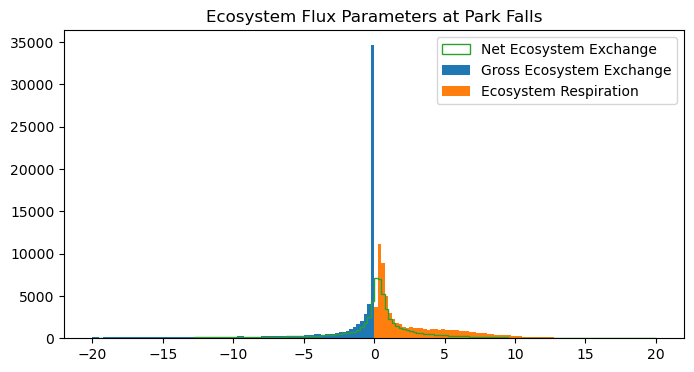

In [13]:
fig,axs=plt.subplots(1,1,figsize=(8,4))

axs.hist(-ec['GPP_PI_F'],bins=np.linspace(-20,0,81))
axs.hist(ec['RECO_PI_F'],bins=np.linspace(0,20,81))
axs.hist(ec['NEE_PI'],bins=np.linspace(-20,20,161),histtype='step');
axs.legend(['Net Ecosystem Exchange','Gross Ecosystem Exchange','Ecosystem Respiration']);
axs.set_title('Ecosystem Flux Parameters at Park Falls')

### **Questions:**
### [1] How do the different distributions compare? 
### [2] Would we use Gaussians to model these distributions?
### [3] Does NEE look like a sum of the other two? How do the means and variances compare?

In [14]:
# Try some calculations of your own here to answer the questions, like computing the sample means and variances. 

## **Multivariate Distributions**

### Once we begin to consider multiple variables, we start to consider how our knowledge of those variables might be connected. For example, our knowledge about the temperature in Washington, D.C. is connected to our knowledge about the temperature in Baltimore. We describe state of knowledge of multiple variables as the "joint" probability distribution, we sometimes write (for two variables) as $Z = (X,Y)$ with distribution $P_Z$. In order to talk about these, we need to discuss a few concepts:
### The covariance between real-valued RVs $X$ and $Y$ is defined by
### $$cov(X,Y) = E[(X-\mu_X)(Y-\mu_Y)]$$ (now a double integral over x and y).
### Note that $cov(X,X) = \sigma_X^2$ and $cov(X,Y) = cov(Y,X)$. The correlation is just covariance scaled by the individual standard deviations:
### $$\rho(X,Y) = \frac{cov(X,Y)}{\sigma_X\sigma_Y}$$ We will often refer to the covariance matrix:
### $$ \Sigma_{XY} = \begin{pmatrix} \sigma_X^2 & cov(X,Y) \\ cov(X,Y) & \sigma_Y^2  \end{pmatrix} $$ More generally, we define the mean for a random vector $X=(X_1,X_2,...,X_n)$ using the means of each component: $$ E[X] = (E[X_1],E[X_2],...,E[X_n]) $$ and the covariance matrix as $$ \Sigma = \begin{pmatrix} \sigma_1^2 & cov(X_1,X_2) & ... & cov(X_1,X_n) \\ cov(X_1,X_2) & \sigma_2^2  & ... & cov(X_2,X_n) \\ \vdots & & & \vdots \\ cov(X_1,X_n) & cov(X_2,X_n) & ... & \sigma^2_n\end{pmatrix}$$ With these definitions in hand, we are ready to write down the joint density for the **multi-variate Gaussian** distribution with random vector $X=(X_1,X_2,...,X_n)$, mean vector $\mu$, and covariance matrix $\Sigma$:
### $$ f(x; \mu,\Sigma)= (2\pi)^{-n/2}|\Sigma|^{-1/2}\exp\left(-\frac{1}{2}(x - \mu)\Sigma^{-1}(x-\mu)\right)$$ where $|\Sigma|$ is the determinant of the covariance matrix.

## 2-D Gaussian Examples

In [15]:
# This time let's use a helper function
from scipy.stats import multivariate_normal

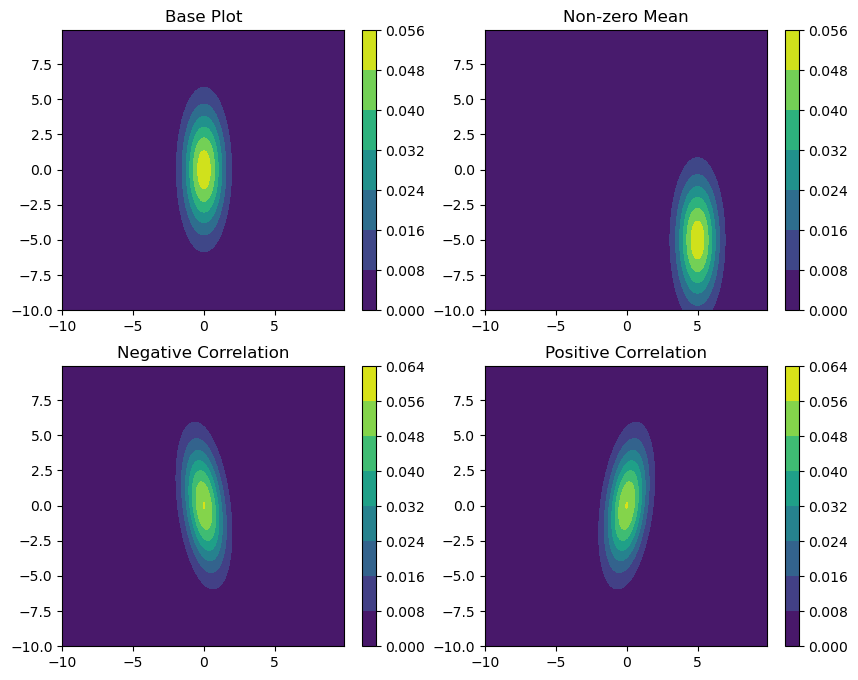

In [16]:
# Plotting grid
x,y = np.mgrid[-10:10:.1, -10:10:.1]
pos = np.dstack((x, y))

# Let's create some Gaussian distributions with different parameters
mu_1 = [0,0]
cov_1 = [[1,0],[0,9]]

# Off-diagonal entries are >0
mu_2 = [0,0]
cov_2 = [[1,0.99],[0.99,9]]

# Off-diagonal entries are <0
mu_3 = [0,0]
cov_3 = [[1,-0.99],[-0.99,9]]

# Mean is non-zero
mu_4 = [5,-5]
cov_4 = [[1,0.],[0.,9]]

# Define the PDFs
pdf_1 = multivariate_normal(mu_1,cov_1).pdf(pos)
pdf_2 = multivariate_normal(mu_2,cov_2).pdf(pos)
pdf_3 = multivariate_normal(mu_3,cov_3).pdf(pos)
pdf_4 = multivariate_normal(mu_4,cov_4).pdf(pos)

fig,axs = plt.subplots(2,2,figsize=(10,8))

ax = axs[0,0]
g = ax.contourf(x,y,pdf_1)
ax.set_title('Base Plot')
plt.colorbar(g,ax=ax)

ax = axs[1,1]
g = ax.contourf(x,y,pdf_2)
ax.set_title('Positive Correlation')
plt.colorbar(g,ax=ax)

ax = axs[1,0]
g = ax.contourf(x,y,pdf_3)
ax.set_title('Negative Correlation')
plt.colorbar(g,ax=ax)

ax = axs[0,1]
g = ax.contourf(x,y,pdf_4)
ax.set_title('Non-zero Mean')
plt.colorbar(g,ax=ax)

### Try it yourself! Copy and paste the code below and modify the parameters to see how different means and covariance matrices modify the shape of the Gaussians. In particular:
### [1] What happens when the variances grow and shrink?
### [2] What happens when the correlations grow and shrink or change sign? Can they be bigger than the variances in absolute value?

In [17]:
# Try it here!


## **Multimodal Distributions**

### Multivariate probability distributions can have multiple modes, which in the PDFs manifest as local maxima. We construct a simple one here as a sum of two multivariate Gaussians.

Text(0.5, 1.0, 'Simple Gaussian Mixture')

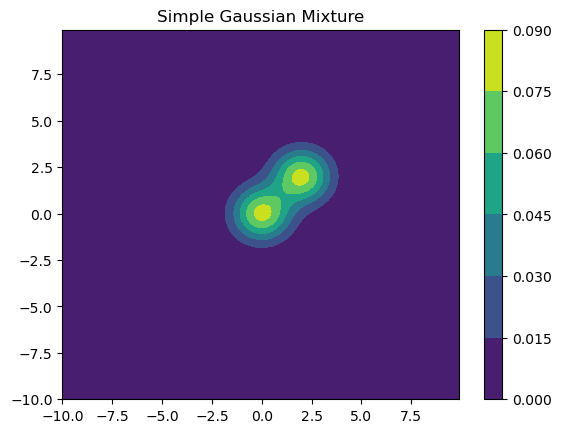

In [18]:
pdf_1 = multivariate_normal([0,0],[[1,0],[0,1]]).pdf(pos)
pdf_2 = multivariate_normal([2,2],[[1,0],[0,1]]).pdf(pos)
plt.contourf(x,y,0.5*pdf_1+0.5*pdf_2)
plt.colorbar()
plt.title('Simple Gaussian Mixture')

## **Working with Multivariate Sample Distributions**

### Let's revisit the Ameriflux dataset from before and make some simple 2D histograms. Vapor pressure deficit (VPD) is a measure of water availability to plants - when it goes up there is likely to be more water stress. We can ask how this might be related to NEE. Each data point represents a sample of the joint distribution of the different quantities.

(0.0, 40.0)

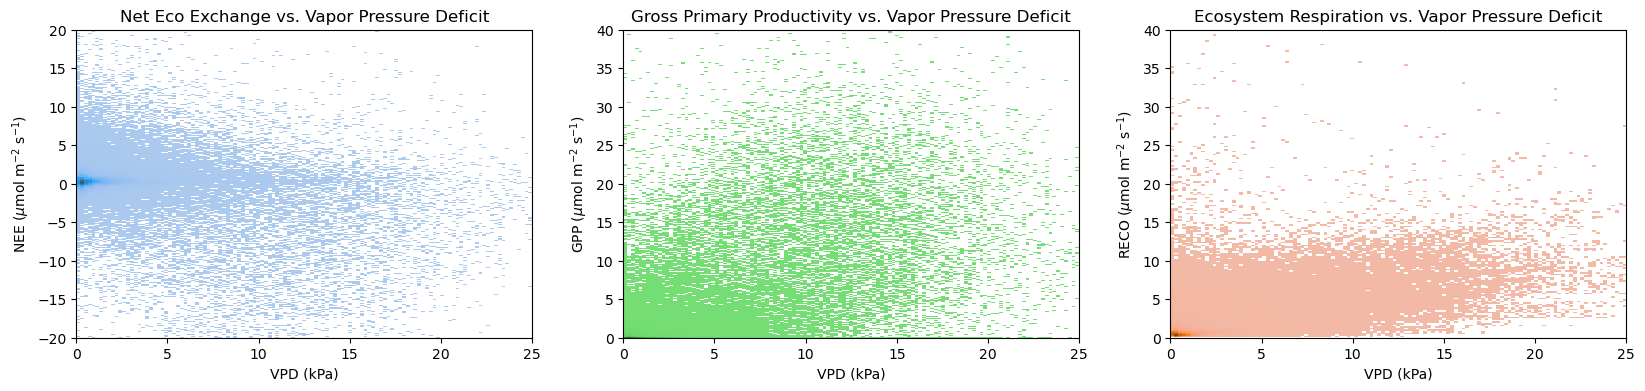

In [19]:
fig,axs = plt.subplots(1,3,figsize=(20,4))

ax=axs[0]
sns.histplot(data=ec,x='VPD_PI_F_1_3_1',y='NEE_PI',ax=ax)#,xlabel='VPD (kPa)',ylabel='NEE ($\mu$mol m$^{-2}$ s$^{-1}$)')
ax.set_title('Net Eco Exchange vs. Vapor Pressure Deficit')
ax.set_xlabel('VPD (kPa)')
ax.set_ylabel('NEE ($\mu$mol m$^{-2}$ s$^{-1}$)')
ax.set_xlim([0,25])
ax.set_ylim([-20,20])

ax=axs[1]
sns.histplot(data=ec,x='VPD_PI_F_1_3_1',y='GPP_PI_F',ax=ax,color='tab:green')
ax.set_title('Gross Primary Productivity vs. Vapor Pressure Deficit')
ax.set_xlabel('VPD (kPa)')
ax.set_ylabel('GPP ($\mu$mol m$^{-2}$ s$^{-1}$)')
ax.set_xlim([0,25])
ax.set_ylim([0,40])

ax=axs[2]
sns.histplot(data=ec,x='VPD_PI_F_1_3_1',y='RECO_PI_F',ax=ax,color='tab:orange')
ax.set_title('Ecosystem Respiration vs. Vapor Pressure Deficit')
ax.set_xlabel('VPD (kPa)')
ax.set_ylabel('RECO ($\mu$mol m$^{-2}$ s$^{-1}$)')
ax.set_xlim([0,25])
ax.set_ylim([0,40])


### Tinker with the plotting parameters above to zoom in on the distributions where the largest mass is (closer to zero, where the colors are darkest).
### [1] Is there any obvious relationship between VPD and NEE/GPP/RECO? 

### [2] Would you expect hotter and drier air (larger VPD) to lead to more or less carbon uptake? Does that manifest here?

## Conditional Distributions
### The conditional probability density $p(y|x)$ for two RVs $X$ and $Y$ can be defined in terms of the joint density $p(x,y)$ and the marginal density $p(x)=\int_{A_y} p(x,y)dy$, where $A_y$ is the support of the RV $Y$:$$ p(y|x) = \frac{p(x,y)}{p(x)}. $$ If we repeat this formula for $p(x|y)$ and solve for $p(x,y)$, we get Bayes Theorem: $$ p(x|y) = \frac{p(y|x)p(x)}{p(y)} \propto p(y|x)p(x)$$ We think about this equation using observations $y$ to enhance our understanding of a parameter $x$ from some prior distribution with density $p(x)$. 

## **Example**: Observational variability
### Suppose we have some sample observations $(y_1,y_2,...,y_n)$ of a quantity $y$ and we believe the errors $$ \epsilon_i = y-y_i$$ are normally distributed and independent. That means that we can predict the likelihood of future variations with specified parameters $x = (\mu,\sigma^2)$. $$ p((\epsilon_i)|x) = (2\pi\sigma^2)^{-n/2}\exp\left(-\frac{1}{2\sigma^2}(\epsilon_1-\mu)^2\right)\exp\left(-\frac{1}{2\sigma^2}(\epsilon_2-\mu)^2\right)\cdot\cdot\cdot\exp\left(-\frac{1}{2\sigma^2}(\epsilon_n-\mu)^2\right)$$
### $$ = (2\pi\sigma^2)^{-n/2}\exp\left(-\frac{1}{2\sigma^2}\sum_{i=1}^{n}(\epsilon_i-\mu)^2\right)$$ 

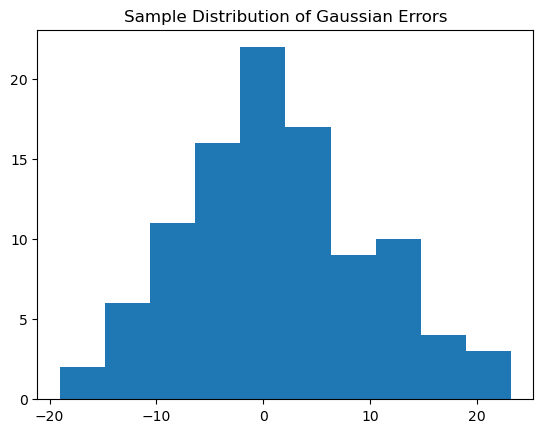

In [20]:
# Simulate some data
mu = 1   #bias
sig = 10 #error variability
eps = mu + 10*np.random.randn(100)
plt.hist(eps);
plt.title('Sample Distribution of Gaussian Errors');

### Now let's forget that we know what the true mean and variance of the error distribution $\epsilon$ is and instead build a model for what it might be in the absence of the samples - the prior distribution/density $p(\mu,\sigma)$. The simplest model is the uniform distribution, with PDF $$ p(\mu,\sigma) = \frac{1}{\mu_b-\mu_a}\frac{1}{\sigma_b-\sigma_a}1_{[\mu_a,\mu_b]}(\mu)1_{[\sigma_a,\sigma_b]}(\sigma) $$ assuming that our knowledge about $\mu$ and $\sigma$ is independent. 

Text(0.5, 1.0, 'Uninformative Prior Distribution $p(\\mu,\\sigma)$')

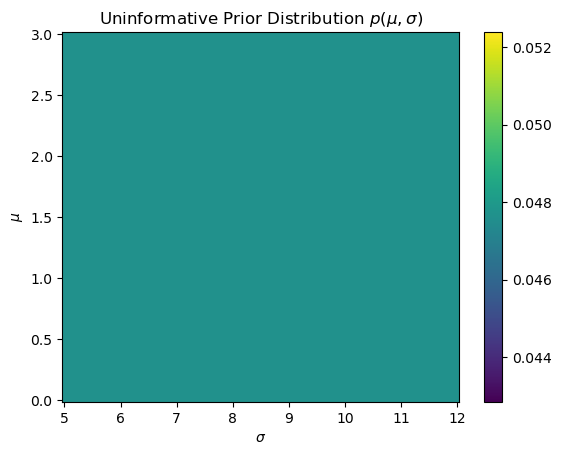

In [21]:
# Now let's build a prior distribution for mu and sig

mu_a = 0
mu_b = 3
sig_a = 5
sig_b = 12

mu_g = np.linspace(mu_a,mu_b,100)
sig_g = np.linspace(sig_a,sig_b,100)
prior = 1/(mu_b-mu_a)/(sig_b-sig_a)*np.ones((len(mu_g),len(sig_g)))
plt.pcolormesh(sig_g,mu_g,prior)
plt.colorbar()
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$\mu$')
plt.title('Uninformative Prior Distribution $p(\mu,\sigma)$')

### We can also plot the likelihood function $p((\epsilon_i) | \mu; \sigma)$

In [22]:
def gaus_likelihood(eps,mu=0,sig=1):
    if not isinstance(eps,(list,tuple,np.ndarray)): gl = gaus_pdf(eps,mu=mu,sig=sig)
    gl = 1.
    for ep in eps:
        gl *= gaus_pdf(ep,mu=mu,sig=sig)
    return gl

In [23]:
likelihood = np.array([[gaus_likelihood(eps,mu=mu_gi,sig=sig_gi) for sig_gi in sig_g] for mu_gi in mu_g])

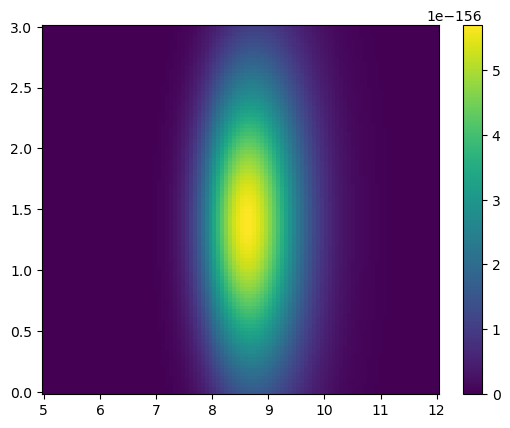

In [24]:
plt.pcolormesh(sig_g,mu_g,likelihood)
plt.colorbar()

### In this setting, we call $p(\mu,\sigma|(\epsilon_i))$ the posterior distribution since it is what we know after we take the data into account. Using Bayes' Rule above,the posterior density is proportional to the product of the likelihood $p((\epsilon_i)|\mu,\sigma)$ and the prior $p(\mu,\sigma)$. To force $p(\mu,\sigma|(\epsilon_i))$ to be a PDF, we can normalize it.

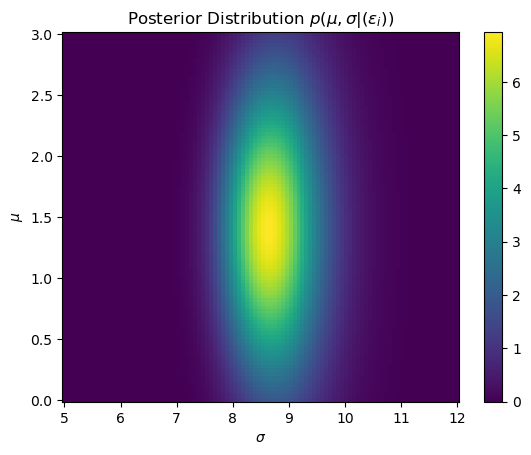

In [25]:
# Compute the posterior:
posterior = likelihood*prior/(likelihood*prior).mean()
plt.pcolormesh(sig_g,mu_g,posterior)
plt.colorbar()
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$\mu$')
plt.title('Posterior Distribution $p(\mu,\sigma|(\epsilon_i))$');

## **Summary** 
### [1] Our goal was to infer the observational error distribution $\epsilon$. 
### [2] We assumed the Gaussian model for $\epsilon$ and wanted to find out the parameters $\mu$ and $\sigma$ of that model. 
### [3] Our prior knowledge of the parameters was limited to a uniform probability over a fixed interval for each parameter. 
### [4] With the data we collected and Bayes' Theorem, we discovered a much more informative distribution for $\mu$ and $\sigma$ than the uniform distribution we started from.

## **Why a distribution for the parameters for the errors? Why not just values?**
### We recognize that we may have some knowledge on the parameters $\mu$ and $\sigma$ before even looking at the data, like the range of reasonable values that they fall into. The posterior density factors in both the mismatch to the data as well as this range of values and is a more complete description of the uncertainty than just single numbers. With a distribution, we can always find point estimates.

In [26]:
# Mean and Mode of the posterior distribution with marginal distributions

mu_mean,sig_mean = (mu_g*posterior.mean(1)).mean(),(sig_g*posterior.mean(0)).mean()
mu_mode,sig_mode = mu_g[np.argmax((posterior.mean(1)))],sig_g[np.argmax(posterior.mean(0))]

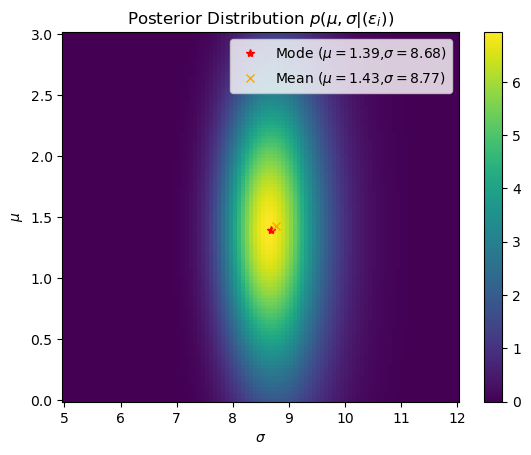

In [27]:
plt.pcolormesh(sig_g,mu_g,posterior)
g1 = plt.plot([sig_mode],[mu_mode],'r*')
g2 = plt.plot([sig_mean],[mu_mean],'x',color='orange')
plt.colorbar()
plt.legend([g1[0],g2[0]],[f'Mode ($\mu=${mu_mode:4.2f},$\sigma=${sig_mode:4.2f})',f'Mean ($\mu=${mu_mean:4.2f},$\sigma=${sig_mean:4.2f})'])
plt.xlabel(r'$\sigma$')
plt.ylabel(r'$\mu$')
plt.title('Posterior Distribution $p(\mu,\sigma|(\epsilon_i))$');

### How well do these point estimates produce models that match the data? The histogram below shows the sample errors $(\epsilon_i)$ along with the Gaussian distributions determined by the parameters $(\mu_{mean},\sigma_{mean})$ and $(\mu_{mode},\sigma_{mode})$. 

Text(0.5, 1.0, 'Sample Data vs. Theoretical Gaussians with Mean/Mode Parameters')

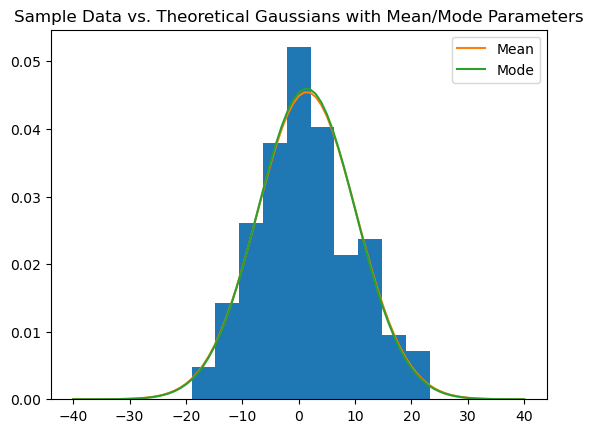

In [29]:
x = np.linspace(-40,40,81)
plt.hist(eps,density=True)
plt.plot(x,gaus_pdf(x,mu_mean,sig_mean))
plt.plot(x,gaus_pdf(x,mu_mode,sig_mode))
plt.legend(['Mean','Mode'])
plt.title('Sample Data vs. Theoretical Gaussians with Mean/Mode Parameters')

## What do you conclude about these two parameter sets for our linear problem?